# DillaDigger: Predicting Music Samples Based on Audio Features

Predict audio features based on Dilla's sampled tracks and use those audio feature predictions to plug into Spotify API recommendation endpoint https://developer.spotify.com/documentation/web-api/reference/get-recommendations

Anoop Patta

## Introduction

A crate digger is defined as "a person who habitually looks through crates of vinyl records at music shops, especially in pursuit of rare or interesting albums". DillaDigger aims to predict and bring light to rare or interesting music.

In [20]:
# imports
import requests
import os
import pandas as pd
from bs4 import BeautifulSoup
import re
import base64
import matplotlib.pyplot as plt
import numpy as np

## Data Collection

In [2]:
dillaSamples = pd.DataFrame(columns=['song_name', 'artists', 'year'])  # Create an empty DataFrame with column names

# loop through the html files
for i in range(1, 51):
    filename = f"raw/{i}.html"
    with open(filename, 'r') as f:
        # scrape the content using BeautifulSoup
        content = f.read()
        soup = BeautifulSoup(content, "html.parser")
        track_connections = soup.find_all('div', class_='track-connection')

        # extract the desired information using regex
        pattern = r"\n\n(.+)\nby ([^(\n]+)(?: feat\. ([^(\n]+))?(?: \((\d{4})\))?\n\n"
        for track in track_connections:
            match = re.search(pattern, track.text)
            if match:
                song_name = match.group(1)
                artists = match.group(2)
                feat_artists = match.group(3)
                year = match.group(4)
                
                if feat_artists:
                    artists = artists + feat_artists.split(' feat. ')
                    
                dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
                                                   ignore_index=True)

print(dillaSamples)


/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94

                     song_name                   artists  year
0         Saudade Vem Correndo  Stan Getz and Luiz Bonfá  1963
1     Diana in the Autumn Wind              Gap Mangione  1968
2                  Dreamflower               Tarika Blue  1976
3               Open Your Eyes            Bobby Caldwell  1980
4     All I Do Is Think of You             The Jackson 5  1975
..                         ...                       ...   ...
492                     Epilog           Jack DeJohnette  1974
493               Get Together                Tony Allen  1999
494              Not Available              Shuggie Otis  1974
495  Love Potion-Cheeba-Cheeba           Mighty Tom Cats  1973
496                   Facelift              Soft Machine  1970

[497 rows x 3 columns]


/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3970828374.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94

In [3]:
dillaSamples = pd.DataFrame(columns=['song_name', 'artists', 'feat_artists', 'year'])  # Create an empty DataFrame with column names

# loop through the html files
for i in range(1, 51):
    filename = f"raw/{i}.html"
    with open(filename, 'r') as f:
        # scrape the content using BeautifulSoup
        content = f.read()
        soup = BeautifulSoup(content, "html.parser")
        track_connections = soup.find_all('div', class_='track-connection')

        # extract the desired information using regex
        pattern = r"\n\n(.+)\nby (.+?)(?: feat\. (.+))?(?: \((\d{4})\))?\n\n"
        for track in track_connections:
            match = re.search(pattern, track.text)
            if match:
                song_name = match.group(1)
                artists = match.group(2).replace('\n', '').replace('\r', '').replace('\t', '').strip()
                feat_artists = match.group(3)
                year = match.group(4)
                
                if feat_artists:
                    feat_artists = feat_artists.replace('\n', '').replace('\r', '').replace('\t', '').strip()
                    feat_artists = ', '.join([a.strip() for a in re.split(',| and ', feat_artists)])
                    artists = ', '.join([a.strip() for a in re.split(',| and ', artists)])
                else:
                    artists = ', '.join([a.strip() for a in re.split(',| and ', artists)])
                    feat_artists = ''
                    
                dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
                                                   ignore_index=True)

print(dillaSamples)

# year still left in featuring artists

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': 

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': 

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': 

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': 

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': 

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': 

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': 

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': 

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': 

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': 

/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': 

                     song_name                artists feat_artists  year
0         Saudade Vem Correndo  Stan Getz, Luiz Bonfá               1963
1     Diana in the Autumn Wind           Gap Mangione               1968
2                  Dreamflower            Tarika Blue               1976
3               Open Your Eyes         Bobby Caldwell               1980
4     All I Do Is Think of You          The Jackson 5               1975
..                         ...                    ...          ...   ...
494                     Epilog        Jack DeJohnette               1974
495               Get Together             Tony Allen               1999
496              Not Available           Shuggie Otis               1974
497  Love Potion-Cheeba-Cheeba        Mighty Tom Cats               1973
498                   Facelift           Soft Machine               1970

[499 rows x 4 columns]


/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': feat_artists, 'year': year},
/var/folders/tq/m0x10dfj1nl_sr651fbj7t7r0000gp/T/ipykernel_94623/3980202097.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dillaSamples = dillaSamples.append({'song_name': song_name, 'artists': artists, 'feat_artists': 

Getting Spotify Auth Token...

If you would like to run this code block, visit https://developer.spotify.com and create an application to get your client_id and client_secret keys.

In [78]:
client_id = '' # SECRET
client_secret = '' # SECRET

auth_url = 'https://accounts.spotify.com/api/token'

auth_headers = {
    'Authorization': 'Basic ' + base64.b64encode((client_id + ':' + client_secret).encode('ascii')).decode('ascii')
}

auth_data = {
    'grant_type': 'client_credentials'
}

response = requests.post(auth_url, headers=auth_headers, data=auth_data)
auth_token = response.json()['access_token']
print(auth_token)
# Set the authorization token in header
headers = {'Authorization': f'Bearer {auth_token}'}

KeyError: 'access_token'

Getting Spotify ID's for each song...

In [5]:
# Iterate through each row in the temp dataframe
for index, row in dillaSamples.iterrows():
    # Set the query parameters
    song_name = row['song_name']
    artist_name = row['artists']
    query_params = {
        'q': f'remaster%2520track:{song_name}%20artist:{artist_name}',
        'type': 'track',
        'limit': 1
    }
    
    # Make Spotify Developer API request
    response = requests.get('https://api.spotify.com/v1/search', params=query_params, headers=headers)
    # Process the response
    if response.status_code == 200:
        response_json = response.json()
        tracks = response_json['tracks']['items']
        if tracks:
            # Only set the spotify_id for the current row being processed
            dillaSamples.loc[index, 'spotify_id'] = tracks[0]["id"]
        else:
            dillaSamples.loc[index, 'spotify_id'] = "None"
    else:
        dillaSamples.loc[index, 'spotify_id'] = "None"
        print(f'Error for {song_name} - {artist_name}: {response.status_code} - {response.text}')

dillaSamples

,song_name,artists,feat_artists,year,spotify_id
0,Saudade Vem Correndo,"Stan Getz, Luiz Bonfá",,1963,3QxAadrRx8aSEVd6Qzr8KF
1,Diana in the Autumn Wind,Gap Mangione,,1968,2yONEvu95BwhLRS3oSyBsB
2,Dreamflower,Tarika Blue,,1976,4iyH37AHAkYK1MVhveeqcm
3,Open Your Eyes,Bobby Caldwell,,1980,5TA4he79xD3fpvy0sidiOV
4,All I Do Is Think of You,The Jackson 5,,1975,5GoheMjTcV8xbbUUWchvjl
...,...,...,...,...,...
494,Epilog,Jack DeJohnette,,1974,7Hz0oqBQQt32fcMioZXyzq
495,Get Together,Tony Allen,,1999,75gmTY9q0aZ3RPmlcEhK0I
496,Not Available,Shuggie Otis,,1974,6vegnfDS8DAEaCqWaPYGPy
497,Love Potion-Cheeba-Cheeba,Mighty Tom Cats,,1973,5ytPMYb6dkoli8sNSEsdmZ


Getting audio features for every song from Spotify...

In [6]:
# Iterate through each row in the dillaSamples dataframe
for index, row in dillaSamples.iterrows(): 
    # Make Spotify Developer API request to get the audio features for the current song
    spotify_id = row['spotify_id']
    if spotify_id:
        response = requests.get(f'https://api.spotify.com/v1/audio-features/{spotify_id}', headers=headers)
        # Process the response to get the audio features
        if response.status_code == 200:
            response_json = response.json()
            dillaSamples.loc[index, 'acousticness'] = response_json["acousticness"]
            dillaSamples.loc[index, 'danceability'] = response_json["danceability"]
            dillaSamples.loc[index, 'energy'] = response_json["energy"]
            dillaSamples.loc[index, 'instrumentalness'] = response_json["instrumentalness"]
            dillaSamples.loc[index, 'key'] = response_json["key"]
            dillaSamples.loc[index, 'liveness'] = response_json["liveness"]
            dillaSamples.loc[index, 'loudness'] = response_json["loudness"]
            dillaSamples.loc[index, 'mode'] = response_json["mode"]
            dillaSamples.loc[index, 'speechiness'] = response_json["speechiness"]
            dillaSamples.loc[index, 'tempo'] = response_json["tempo"]
            dillaSamples.loc[index, 'time_signature'] = response_json["time_signature"]
            dillaSamples.loc[index, 'valence'] = response_json["valence"]
        else:
            print(f'Error for {song_name} - {artist_name}: {response.status_code} - {response.text}')
    else:
        print(f'Skipping {song_name} - {artist_name} as no Spotify ID found')
    
dillaSamples

,song_name,artists,feat_artists,year,spotify_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Saudade Vem Correndo,"Stan Getz, Luiz Bonfá",,1963,3QxAadrRx8aSEVd6Qzr8KF,0.94600,0.634,0.288,0.163000,4.0,0.3660,-16.798,1.0,0.0377,90.633,4.0,0.671
1,Diana in the Autumn Wind,Gap Mangione,,1968,2yONEvu95BwhLRS3oSyBsB,0.66100,0.525,0.417,0.006670,7.0,0.1370,-10.423,0.0,0.0291,100.789,4.0,0.291
2,Dreamflower,Tarika Blue,,1976,4iyH37AHAkYK1MVhveeqcm,0.77000,0.551,0.252,0.719000,3.0,0.0834,-17.767,0.0,0.0293,134.878,4.0,0.376
3,Open Your Eyes,Bobby Caldwell,,1980,5TA4he79xD3fpvy0sidiOV,0.88900,0.735,0.287,0.001240,2.0,0.0776,-17.593,1.0,0.0465,95.539,4.0,0.409
4,All I Do Is Think of You,The Jackson 5,,1975,5GoheMjTcV8xbbUUWchvjl,0.57100,0.545,0.642,0.000003,8.0,0.0881,-6.535,0.0,0.0379,121.654,4.0,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Epilog,Jack DeJohnette,,1974,7Hz0oqBQQt32fcMioZXyzq,0.16500,0.685,0.468,0.328000,11.0,0.0975,-12.354,0.0,0.0889,147.733,4.0,0.966
495,Get Together,Tony Allen,,1999,75gmTY9q0aZ3RPmlcEhK0I,0.00107,0.664,0.638,0.594000,10.0,0.1020,-6.494,0.0,0.1310,159.905,5.0,0.700
496,Not Available,Shuggie Otis,,1974,6vegnfDS8DAEaCqWaPYGPy,0.55200,0.754,0.631,0.000000,7.0,0.5000,-4.751,0.0,0.3070,94.577,4.0,0.432
497,Love Potion-Cheeba-Cheeba,Mighty Tom Cats,,1973,5ytPMYb6dkoli8sNSEsdmZ,0.57200,0.738,0.451,0.000000,7.0,0.1750,-12.949,1.0,0.1460,128.853,4.0,0.793


Getting track popularity, album popularity, release date, genres from Spotify... I chose to include stats about the album because samples were discovered by scanning over an entire record, typically an album.

In [7]:
# Iterate through each row in the dillaSamples dataframe
for index, row in dillaSamples.iterrows():
        
    # Make Spotify Developer API request to get the audio features for the current song
    spotify_id = row['spotify_id']
    if spotify_id:
        response = requests.get(f'https://api.spotify.com/v1/tracks/{spotify_id}', headers=headers)
        if response.status_code == 200:
            response_json = response.json()
            song_popularity = response_json.get("popularity")
            album = response_json.get("album")
            if album:
                album_popularity = album.get("popularity")
                release_date = album.get("release_date")
                genres = album.get("genres")
                album_id = album.get("id")
            else:
                album_popularity = None
                release_date = None
                genres = None
            dillaSamples.loc[index, 'song_popularity'] = song_popularity
            dillaSamples.loc[index, 'album_popularity'] = album_popularity
            dillaSamples.loc[index, 'release_date'] = release_date
            dillaSamples.loc[index, 'genres'] = genres
            dillaSamples.loc[index, 'album_id'] = album_id
        else:
            error_msg = f'Error for {row["song_name"]} - {row["artist_name"]}: {response.status_code} - {response.text}'
    else:
        print(f'Skipping {row["song_name"]} - {row["artist_name"]} as no Spotify ID found')

dillaSamples.loc[index, ['song_popularity', 'album_popularity', 'release_date', 'genres', 'album_id']] = [
    song_popularity, album_popularity, release_date, genres, album_id
]

dillaSamples

,song_name,artists,feat_artists,year,spotify_id,acousticness,danceability,energy,instrumentalness,key,...,mode,speechiness,tempo,time_signature,valence,song_popularity,album_popularity,release_date,genres,album_id
0,Saudade Vem Correndo,"Stan Getz, Luiz Bonfá",,1963,3QxAadrRx8aSEVd6Qzr8KF,0.94600,0.634,0.288,0.163000,4.0,...,1.0,0.0377,90.633,4.0,0.671,53.0,NaN,1963,NaN,1JDkIxq4xRW7ySH89sGflc
1,Diana in the Autumn Wind,Gap Mangione,,1968,2yONEvu95BwhLRS3oSyBsB,0.66100,0.525,0.417,0.006670,7.0,...,0.0,0.0291,100.789,4.0,0.291,14.0,NaN,1972-01-01,NaN,6N4Rt0WZfDHj0PKUZllzIt
2,Dreamflower,Tarika Blue,,1976,4iyH37AHAkYK1MVhveeqcm,0.77000,0.551,0.252,0.719000,3.0,...,0.0,0.0293,134.878,4.0,0.376,47.0,NaN,1977,NaN,7HAwI2tHY7ReYr2pjg4eWT
3,Open Your Eyes,Bobby Caldwell,,1980,5TA4he79xD3fpvy0sidiOV,0.88900,0.735,0.287,0.001240,2.0,...,1.0,0.0465,95.539,4.0,0.409,55.0,NaN,1991-10-10,NaN,61MrCsj5a0ZfgbgvcFHFl0
4,All I Do Is Think of You,The Jackson 5,,1975,5GoheMjTcV8xbbUUWchvjl,0.57100,0.545,0.642,0.000003,8.0,...,0.0,0.0379,121.654,4.0,0.511,52.0,NaN,1975-05-15,NaN,188ahHnUfbFoFoBfEmqs1i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Epilog,Jack DeJohnette,,1974,7Hz0oqBQQt32fcMioZXyzq,0.16500,0.685,0.468,0.328000,11.0,...,0.0,0.0889,147.733,4.0,0.966,28.0,NaN,1974-01-01,NaN,60M1pJiaLjcAMg8zTskV8A
495,Get Together,Tony Allen,,1999,75gmTY9q0aZ3RPmlcEhK0I,0.00107,0.664,0.638,0.594000,10.0,...,0.0,0.1310,159.905,5.0,0.700,19.0,NaN,1999,NaN,4PdHoVfinDBf2HIyQbpHQG
496,Not Available,Shuggie Otis,,1974,6vegnfDS8DAEaCqWaPYGPy,0.55200,0.754,0.631,0.000000,7.0,...,0.0,0.3070,94.577,4.0,0.432,73.0,NaN,2011-08-08,NaN,2P2Xwvh2xWXIZ1OWY9S9o5
497,Love Potion-Cheeba-Cheeba,Mighty Tom Cats,,1973,5ytPMYb6dkoli8sNSEsdmZ,0.57200,0.738,0.451,0.000000,7.0,...,1.0,0.1460,128.853,4.0,0.793,59.0,NaN,1991-08-10,NaN,6tfGv9PH9Kx1fKpp2dVe4y


In [39]:
print(dillaSamples.columns)

Index(['song_name', 'artists', 'feat_artists', 'year', 'spotify_id',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'song_popularity', 'album_popularity',
       'release_date', 'genres', 'album_id'],
      dtype='object')


In [61]:
dillaSamples = dillaSamples.drop(['genres', 'release_date', 'album_popularity', 'album_id'], axis=1)

In [62]:
dillaSamples

,song_name,artists,feat_artists,year,spotify_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_popularity
0,Saudade Vem Correndo,"Stan Getz, Luiz Bonfá",,1963,3QxAadrRx8aSEVd6Qzr8KF,0.94600,0.634,0.288,0.163000,4.0,0.3660,-16.798,1.0,0.0377,90.633,4.0,0.671,53.0
1,Diana in the Autumn Wind,Gap Mangione,,1968,2yONEvu95BwhLRS3oSyBsB,0.66100,0.525,0.417,0.006670,7.0,0.1370,-10.423,0.0,0.0291,100.789,4.0,0.291,14.0
2,Dreamflower,Tarika Blue,,1976,4iyH37AHAkYK1MVhveeqcm,0.77000,0.551,0.252,0.719000,3.0,0.0834,-17.767,0.0,0.0293,134.878,4.0,0.376,47.0
3,Open Your Eyes,Bobby Caldwell,,1980,5TA4he79xD3fpvy0sidiOV,0.88900,0.735,0.287,0.001240,2.0,0.0776,-17.593,1.0,0.0465,95.539,4.0,0.409,55.0
4,All I Do Is Think of You,The Jackson 5,,1975,5GoheMjTcV8xbbUUWchvjl,0.57100,0.545,0.642,0.000003,8.0,0.0881,-6.535,0.0,0.0379,121.654,4.0,0.511,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Epilog,Jack DeJohnette,,1974,7Hz0oqBQQt32fcMioZXyzq,0.16500,0.685,0.468,0.328000,11.0,0.0975,-12.354,0.0,0.0889,147.733,4.0,0.966,28.0
495,Get Together,Tony Allen,,1999,75gmTY9q0aZ3RPmlcEhK0I,0.00107,0.664,0.638,0.594000,10.0,0.1020,-6.494,0.0,0.1310,159.905,5.0,0.700,19.0
496,Not Available,Shuggie Otis,,1974,6vegnfDS8DAEaCqWaPYGPy,0.55200,0.754,0.631,0.000000,7.0,0.5000,-4.751,0.0,0.3070,94.577,4.0,0.432,73.0
497,Love Potion-Cheeba-Cheeba,Mighty Tom Cats,,1973,5ytPMYb6dkoli8sNSEsdmZ,0.57200,0.738,0.451,0.000000,7.0,0.1750,-12.949,1.0,0.1460,128.853,4.0,0.793,59.0


## Exploratory Data Analysis

Distribution of samples by year

I dropped all samples that came out after 2006 too include all songs that were released up to his death. 

Year min: 1949
Year max: 2006
Year mean: 1976.8509316770187
Year median: 1974.0


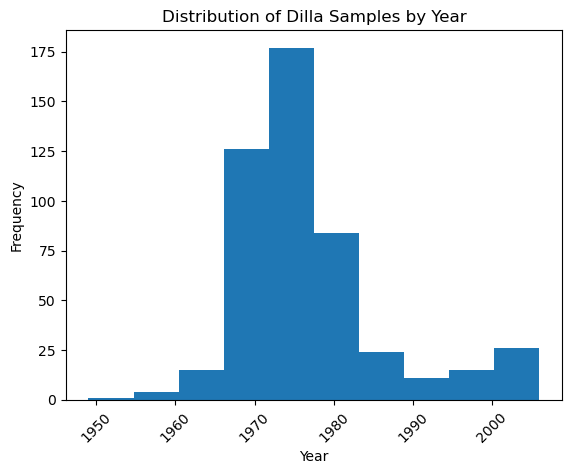

In [38]:
dillaSamples = dillaSamples.dropna(subset=['year'])
dillaSamples['year'] = pd.to_numeric(dillaSamples['year'], errors='coerce')
dillaSamples = dillaSamples[dillaSamples['year'] <= 2006]

# Get the min and max of years
year_min = dillaSamples['year'].min()
year_max = dillaSamples['year'].max()
# Get the mean and median of the year column
year_mean = np.nanmean(dillaSamples['year'])
year_median = dillaSamples['year'].median()

print("Year min:", year_min)
print("Year max:", year_max)
print("Year mean:", year_mean)
print("Year median:", year_median)

# Create the histogram
plt.hist(dillaSamples['year'])

# Set the title and axis labels
plt.title('Distribution of Dilla Samples by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the histogram
plt.show()

Tempo min: 0.0
Tempo max: 199.241
Tempo mean: 115.11025672877847
Tempo median: 109.277


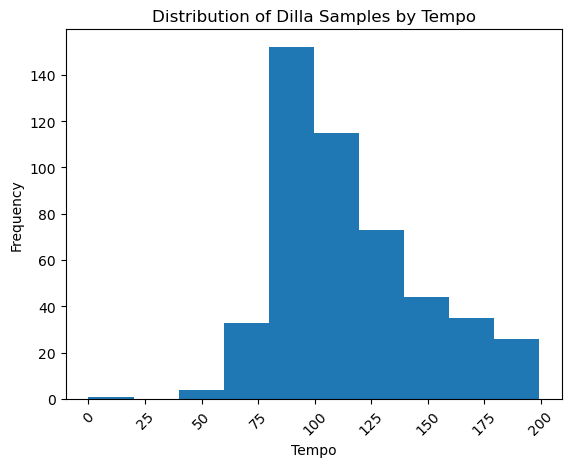

In [37]:
dillaSamples = dillaSamples.dropna(subset=['tempo'])

# Get the min and max of tempo
tempo_min = dillaSamples['tempo'].min()
tempo_max = dillaSamples['tempo'].max()
# Get the mean and median of the year column
tempo_mean = np.nanmean(dillaSamples['tempo'])
tempo_median = dillaSamples['tempo'].median()

print("Tempo min:", tempo_min)
print("Tempo max:", tempo_max)
print("Tempo mean:", tempo_mean)
print("Tempo median:", tempo_median)

# Create the histogram
plt.hist(dillaSamples['tempo'])

# Set the title and axis labels
plt.title('Distribution of Dilla Samples by Tempo')
plt.xlabel('Tempo')
plt.ylabel('Frequency')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the histogram
plt.show()

Acousticness min: 3.35e-06
Acousticness max: 0.996
Acousticness mean: 0.43743942122153207
Acousticness median: 0.408


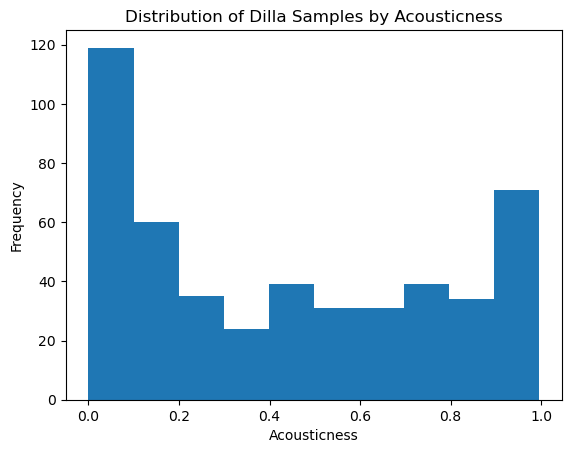

In [40]:
# Drop rows with missing values in the specified columns
dillaSamples = dillaSamples.dropna(subset=['acousticness'])

# Get the min and max of acousticness
acousticness_min = dillaSamples['acousticness'].min()
acousticness_max = dillaSamples['acousticness'].max()
# Get the mean and median of the acousticness column
acousticness_mean = np.nanmean(dillaSamples['acousticness'])
acousticness_median = dillaSamples['acousticness'].median()

print("Acousticness min:", acousticness_min)
print("Acousticness max:", acousticness_max)
print("Acousticness mean:", acousticness_mean)
print("Acousticness median:", acousticness_median)

# Create the histogram
plt.hist(dillaSamples['acousticness'])

# Set the title and axis labels
plt.title('Distribution of Dilla Samples by Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

 'acousticness', 'danceability', 'energy', 'instrumentalness', ,
       'liveness', 'loudness', 'mode', 'speechiness', 'valence', 'song_popularity',  'genres'

Danceability min: 0.0
Danceability max: 0.988
Danceability mean: 0.5377428571428572
Danceability median: 0.551


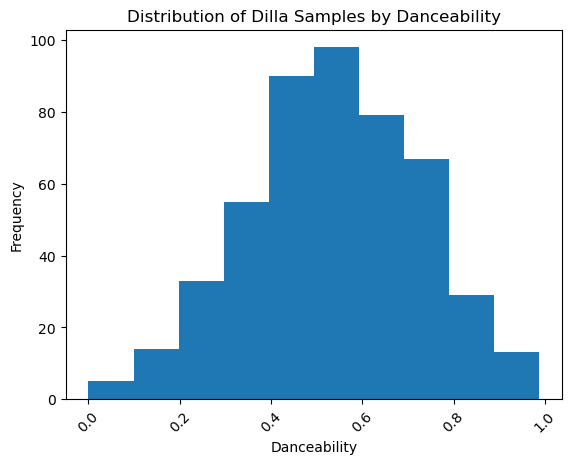

In [42]:
dillaSamples = dillaSamples.dropna(subset=['danceability'])

# Get the min and max of danceability
danceability_min = dillaSamples['danceability'].min()
danceability_max = dillaSamples['danceability'].max()
# Get the mean and median of the danceability column
danceability_mean = np.nanmean(dillaSamples['danceability'])
danceability_median = dillaSamples['danceability'].median()

print("Danceability min:", danceability_min)
print("Danceability max:", danceability_max)
print("Danceability mean:", danceability_mean)
print("Danceability median:", danceability_median)

# Create the histogram
plt.hist(dillaSamples['danceability'])

# Set the title and axis labels
plt.title('Distribution of Dilla Samples by Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the histogram
plt.show()

Energy min: 0.00572
Energy max: 0.996
Energy mean: 0.48261556935817806
Energy median: 0.483


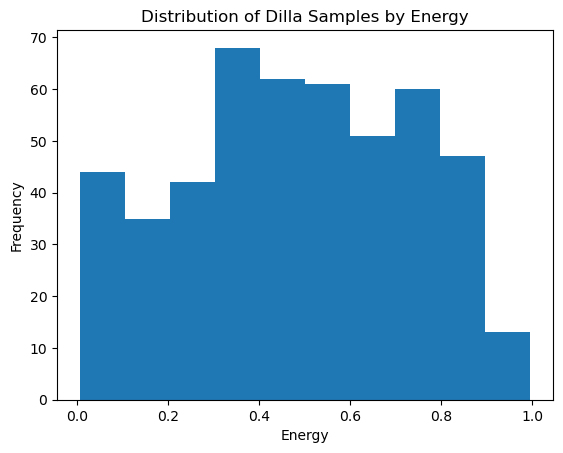

In [43]:
dillaSamples = dillaSamples.dropna(subset=['energy'])

# Get the min and max of energy
energy_min = dillaSamples['energy'].min()
energy_max = dillaSamples['energy'].max()
# Get the mean and median of the energy column
energy_mean = np.nanmean(dillaSamples['energy'])
energy_median = dillaSamples['energy'].median()

print("Energy min:", energy_min)
print("Energy max:", energy_max)
print("Energy mean:", energy_mean)
print("Energy median:", energy_median)

# Create the histogram
plt.hist(dillaSamples['energy'])

# Set the title and axis labels
plt.title('Distribution of Dilla Samples by Energy')
plt.xlabel('Energy')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

Instrumentalness min: 0.0
Instrumentalness max: 0.993
Instrumentalness mean: 0.2822649838302278
Instrumentalness median: 0.0156


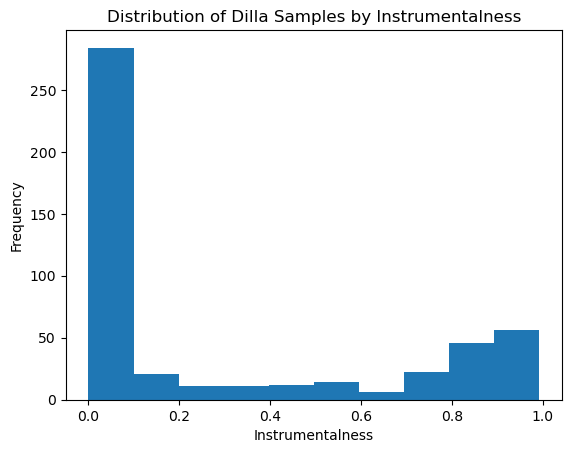

In [44]:
dillaSamples = dillaSamples.dropna(subset=['instrumentalness'])

# Get the min and max of instrumentalness
instrumentalness_min = dillaSamples['instrumentalness'].min()
instrumentalness_max = dillaSamples['instrumentalness'].max()
# Get the mean and median of the instrumentalness column
instrumentalness_mean = np.nanmean(dillaSamples['instrumentalness'])
instrumentalness_median = dillaSamples['instrumentalness'].median()

print("Instrumentalness min:", instrumentalness_min)
print("Instrumentalness max:", instrumentalness_max)
print("Instrumentalness mean:", instrumentalness_mean)
print("Instrumentalness median:", instrumentalness_median)

# Create the histogram
plt.hist(dillaSamples['instrumentalness'])

# Set the title and axis labels
plt.title('Distribution of Dilla Samples by Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

Liveness min: 0.0277
Liveness max: 0.965
Liveness mean: 0.18254140786749481
Liveness median: 0.12


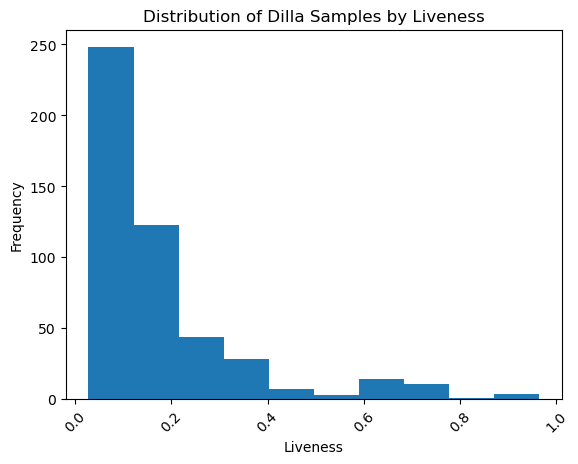

In [45]:
dillaSamples = dillaSamples.dropna(subset=['liveness'])

# Get the min and max of liveness
liveness_min = dillaSamples['liveness'].min()
liveness_max = dillaSamples['liveness'].max()
# Get the mean and median of the liveness column
liveness_mean = np.nanmean(dillaSamples['liveness'])
liveness_median = dillaSamples['liveness'].median()

print("Liveness min:", liveness_min)
print("Liveness max:", liveness_max)
print("Liveness mean:", liveness_mean)
print("Liveness median:", liveness_median)

# Create the histogram
plt.hist(dillaSamples['liveness'])

# Set the title and axis labels
plt.title('Distribution of Dilla Samples by Liveness')
plt.xlabel('Liveness')
plt.ylabel('Frequency')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the histogram
plt.show()

Loudness min: -32.309
Loudness max: -2.654
Loudness mean: -12.633946169772257
Loudness median: -11.626


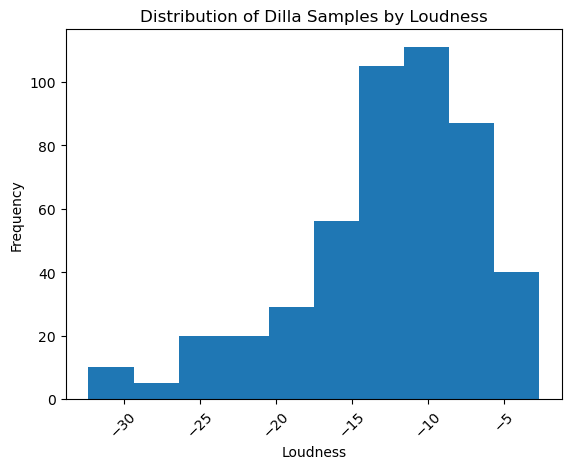

In [46]:
# Drop rows with missing values in the 'loudness' column
dillaSamples = dillaSamples.dropna(subset=['loudness'])

# Get the min and max of loudness
loudness_min = dillaSamples['loudness'].min()
loudness_max = dillaSamples['loudness'].max()
# Get the mean and median of the loudness column
loudness_mean = np.nanmean(dillaSamples['loudness'])
loudness_median = dillaSamples['loudness'].median()

print("Loudness min:", loudness_min)
print("Loudness max:", loudness_max)
print("Loudness mean:", loudness_mean)
print("Loudness median:", loudness_median)

# Create the histogram
plt.hist(dillaSamples['loudness'])

# Set the title and axis labels
plt.title('Distribution of Dilla Samples by Loudness')
plt.xlabel('Loudness')
plt.ylabel('Frequency')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the histogram
plt.show()


Mode min: 0.0
Mode max: 1.0
Mode mean: 0.5113871635610766
Mode median: 1.0


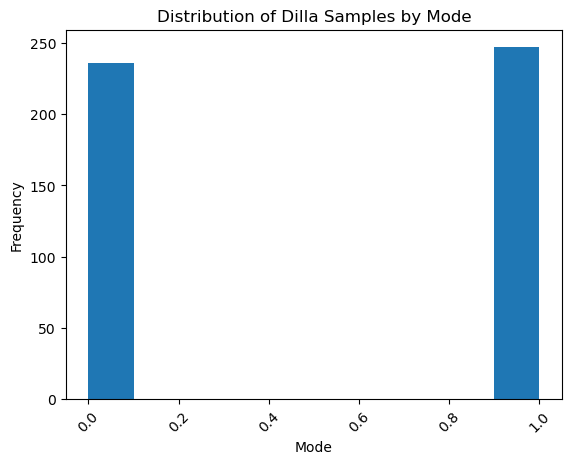

In [47]:
# Get the min and max of mode
mode_min = dillaSamples['mode'].min()
mode_max = dillaSamples['mode'].max()
# Get the mean and median of the mode column
mode_mean = np.nanmean(dillaSamples['mode'])
mode_median = dillaSamples['mode'].median()

print("Mode min:", mode_min)
print("Mode max:", mode_max)
print("Mode mean:", mode_mean)
print("Mode median:", mode_median)

# Create the histogram
plt.hist(dillaSamples['mode'])

# Set the title and axis labels
plt.title('Distribution of Dilla Samples by Mode')
plt.xlabel('Mode')
plt.ylabel('Frequency')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the histogram
plt.show()


Speechiness min: 0.0
Speechiness max: 0.96
Speechiness mean: 0.08821884057971015
Speechiness median: 0.0459


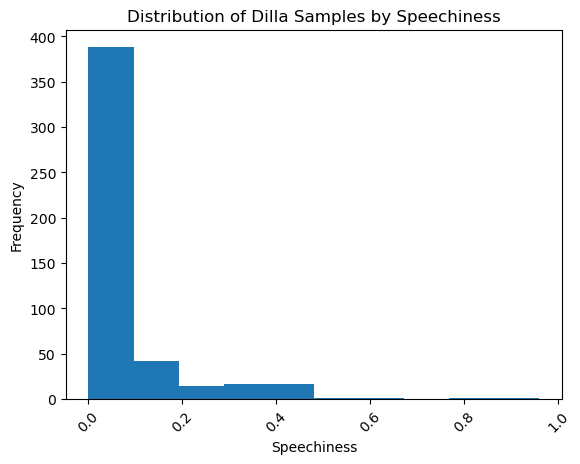

In [48]:
# Drop rows with missing values for speechiness
dillaSamples = dillaSamples.dropna(subset=['speechiness'])

# Get the min and max of speechiness
speechiness_min = dillaSamples['speechiness'].min()
speechiness_max = dillaSamples['speechiness'].max()
# Get the mean and median of the speechiness column
speechiness_mean = np.nanmean(dillaSamples['speechiness'])
speechiness_median = dillaSamples['speechiness'].median()

print("Speechiness min:", speechiness_min)
print("Speechiness max:", speechiness_max)
print("Speechiness mean:", speechiness_mean)
print("Speechiness median:", speechiness_median)

# Create the histogram
plt.hist(dillaSamples['speechiness'])

# Set the title and axis labels
plt.title('Distribution of Dilla Samples by Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Frequency')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the histogram
plt.show()


Valence min: 0.0
Valence max: 0.976
Valence mean: 0.49958033126294
Valence median: 0.524


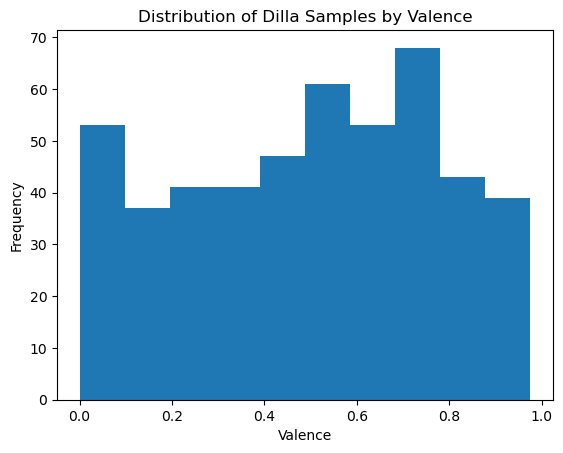

In [49]:
# Drop any rows with missing values for valence
dillaSamples = dillaSamples.dropna(subset=['valence'])

# Get the min and max of valence
valence_min = dillaSamples['valence'].min()
valence_max = dillaSamples['valence'].max()

# Get the mean and median of valence
valence_mean = np.nanmean(dillaSamples['valence'])
valence_median = dillaSamples['valence'].median()

print("Valence min:", valence_min)
print("Valence max:", valence_max)
print("Valence mean:", valence_mean)
print("Valence median:", valence_median)

# Create the histogram
plt.hist(dillaSamples['valence'])

# Set the title and axis labels
plt.title('Distribution of Dilla Samples by Valence')
plt.xlabel('Valence')
plt.ylabel('Frequency')

# Display the histogram
plt.show()


Song popularity min: 0.0
Song popularity max: 87.0
Song popularity mean: 39.58592132505176
Song popularity median: 41.0


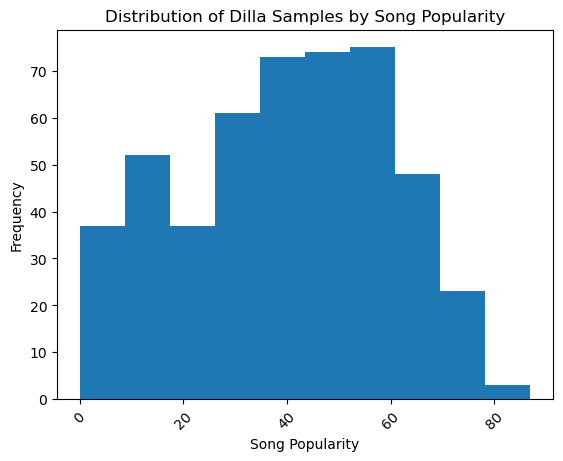

In [50]:
dillaSamples = dillaSamples.dropna(subset=['song_popularity'])

# Get the min and max of song_popularity
song_popularity_min = dillaSamples['song_popularity'].min()
song_popularity_max = dillaSamples['song_popularity'].max()
# Get the mean and median of the song_popularity column
song_popularity_mean = np.nanmean(dillaSamples['song_popularity'])
song_popularity_median = dillaSamples['song_popularity'].median()

print("Song popularity min:", song_popularity_min)
print("Song popularity max:", song_popularity_max)
print("Song popularity mean:", song_popularity_mean)
print("Song popularity median:", song_popularity_median)

# Create the histogram
plt.hist(dillaSamples['song_popularity'])

# Set the title and axis labels
plt.title('Distribution of Dilla Samples by Song Popularity')
plt.xlabel('Song Popularity')
plt.ylabel('Frequency')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the histogram
plt.show()


Key min: 0.0
Key max: 11.0
Key mean: 5.594202898550725
Key median: 6.0


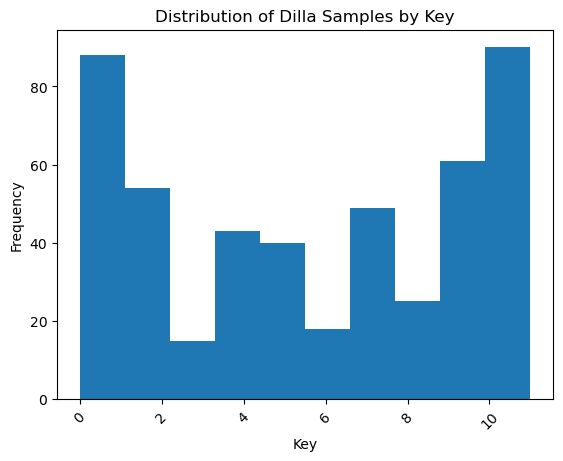

In [63]:
# Drop rows with missing values for key
dillaSamples = dillaSamples.dropna(subset=['key'])

# Get the min and max of key
key_min = dillaSamples['key'].min()
key_max = dillaSamples['key'].max()
# Get the mean and median of the key column
key_mean = np.nanmean(dillaSamples['key'])
key_median = dillaSamples['key'].median()

print("Key min:", key_min)
print("Key max:", key_max)
print("Key mean:", key_mean)
print("Key median:", key_median)

# Create the histogram
plt.hist(dillaSamples['key'])

# Set the title and axis labels
plt.title('Distribution of Dilla Samples by Key')
plt.xlabel('Key')
plt.ylabel('Frequency')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the histogram
plt.show()


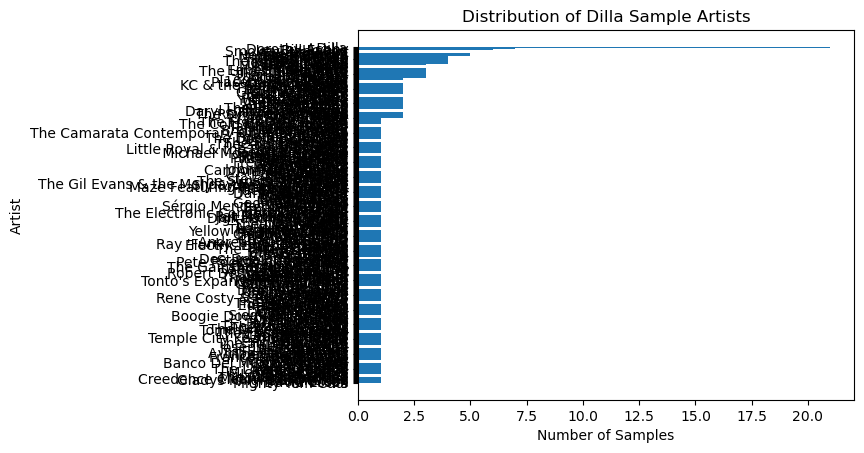

In [72]:
# Split the artists column on commas and explode to create new row for each artist
artist_counts = dillaSamples['artists'].str.split(',', expand=True).stack().reset_index(drop=True)

# Count the frequency of each artist
artist_counts = artist_counts.value_counts()

# Create the bar plot
plt.barh(artist_counts.index, artist_counts.values)

# Set the title and axis labels
plt.title('Distribution of Dilla Sample Artists')
plt.xlabel('Number of Samples')
plt.ylabel('Artist')

# Invert the y-axis to show most frequent artists at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()


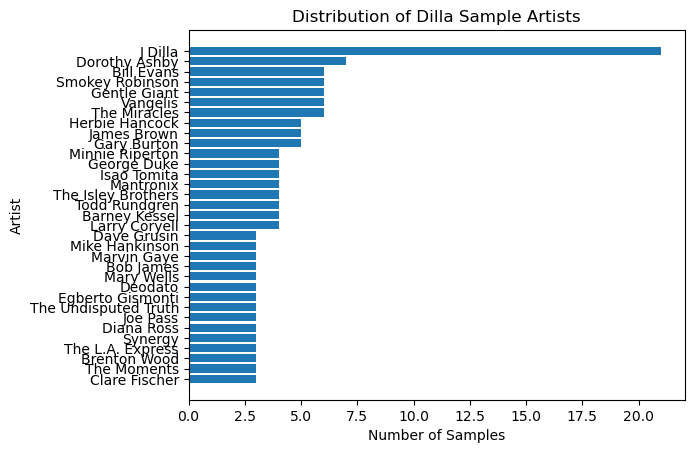

In [74]:
# Split the artists column on commas and explode to create new row for each artist
artist_counts = dillaSamples['artists'].str.split(',', expand=True).stack().reset_index(drop=True)

# Count the frequency of each artist
artist_counts = artist_counts.value_counts()

# Keep only the artists that were sampled more than once
artist_counts = artist_counts[artist_counts > 2]

# Create the bar plot
plt.barh(artist_counts.index, artist_counts.values)

# Set the title and axis labels
plt.title('Distribution of Dilla Sample Artists')
plt.xlabel('Number of Samples')
plt.ylabel('Artist')

# Invert the y-axis to show most frequent artists at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()


In [77]:
top_artists = dillaSamples['artists'].value_counts().head(25)
print(top_artists)

J Dilla                          21
Dorothy Ashby                     7
Gentle Giant                      6
Smokey Robinson, The Miracles     6
Vangelis                          6
James Brown                       5
Bill Evans                        5
Herbie Hancock                    5
George Duke                       4
Mantronix                         4
Barney Kessel                     4
Minnie Riperton                   4
Todd Rundgren                     4
The Isley Brothers                4
Isao Tomita                       4
Brenton Wood                      3
Bob James                         3
Gary Burton                       3
Dave Grusin                       3
The L.A. Express                  3
Marvin Gaye                       3
The Undisputed Truth              3
Egberto Gismonti                  3
Joe Pass                          3
Mary Wells                        3
Name: artists, dtype: int64
